In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


data = pd.read_csv("ACE2_train_data.csv")

class ACE2Dataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file, sep=',', header=None)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        sample = {'id': self.data.iloc[idx, 0],
                  'junction_aa': self.data.iloc[idx, 1],
                  'consensus_count': self.data.iloc[idx, 2],
                  'Label': self.data.iloc[idx, 3],
                  'Distance': self.data.iloc[idx, 4]}

        return sample

ace2_dataset = ACE2Dataset('ACE2_train_data.csv')
ace2_dataloader = DataLoader(ace2_dataset, batch_size=32, shuffle=True)

/tmp/ipykernel_33900/3533163934.py:12: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(csv_file, sep=',', header=None)


In [5]:
data.describe()

,Unnamed: 0,consensus_count,Label,Distance
count,406886.000000,406886.000000,406886.000000,406886.000000
mean,323195.466440,1.443908,0.500027,9.017398
std,189813.180032,1.423285,0.500001,1.167593
min,0.000000,1.000000,0.000000,1.000000
25%,154232.250000,1.000000,0.000000,8.000000
50%,325632.500000,1.000000,1.000000,9.000000
75%,483459.500000,2.000000,1.000000,10.000000
max,663081.000000,310.000000,1.000000,12.000000


In [6]:
import csv

# read in the first few lines of the file
with open('ACE2_train_data.csv', 'r') as f:
    first_lines = [f.readline() for _ in range(10)]

# use csv.Sniffer to determine the delimiter
dialect = csv.Sniffer().sniff('\n'.join(first_lines))

print(dialect.delimiter)

# use the dialect object to read in the file
#with open('ACE2_train_data.csv', 'r') as f:
#    reader = csv.reader(f, dialect=dialect)
#    for row in reader:
#        # do something with the row data
#        print(row)

,


In [7]:
dialect.delimiter


','

In [8]:
data.iloc[1, 1]

'KNEQFNCYGPINAYGFQRTGGEDW'

In [9]:
data.iloc[:, 1].apply(list)

0         [K, N, A, G, F, N, C, Y, N, P, L, E, T, Y, G, ...
1         [K, N, E, Q, F, N, C, Y, G, P, I, N, A, Y, G, ...
2         [K, N, Q, K, F, N, C, Y, V, P, L, F, H, Y, G, ...
3         [K, N, Q, G, F, N, C, Y, N, P, L, V, N, Y, G, ...
4         [K, N, R, G, F, N, C, Y, K, P, L, P, G, Y, G, ...
                                ...                        
406881    [K, N, K, G, F, N, C, Y, I, P, I, E, D, Y, G, ...
406882    [K, N, E, G, F, N, C, Y, N, P, I, T, E, Y, G, ...
406883    [K, N, G, K, F, N, C, Y, H, P, I, V, R, Y, G, ...
406884    [K, N, G, Q, F, N, C, Y, I, P, I, A, G, Y, G, ...
406885    [K, N, R, G, F, N, C, Y, T, P, I, F, K, Y, G, ...
Name: junction_aa, Length: 406886, dtype: object

In [10]:
data.iloc[:, 1]

0         KNAGFNCYNPLETYGFWRTGGVDW
1         KNEQFNCYGPINAYGFQRTGGEDW
2         KNQKFNCYVPLFHYGFWPTVGVGF
3         KNQGFNCYNPLVNYGFYRTNGRSF
4         KNRGFNCYKPLPGYGFQRTDGINW
                    ...           
406881    KNKGFNCYIPIEDYGFQRTSGRSY
406882    KNEGFNCYNPITEYGFWTTSGLDW
406883    KNGKFNCYHPIVRYGFHPTVGRGY
406884    KNGQFNCYIPIAGYGFLPTLGVSY
406885    KNRGFNCYTPIFKYGFFTTWGRNY
Name: junction_aa, Length: 406886, dtype: object

In [11]:
from gensim.models import Word2Vec
vec_size = 10
win_size = 2
epochs = 100

sentences = data.iloc[:, 1].apply(list)

model = Word2Vec(sentences, vector_size=vec_size, window=win_size, min_count=1)
model.train(sentences, total_examples=len(sentences), epochs=epochs)



KeyboardInterrupt: 

In [97]:
model.save('Word2Vec_vs10_ws2_e100.model')


In [110]:
A = 'AAA'
A.split()

['AAA']

In [114]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
min_count = 1
docs = data.iloc[:, 1]

documents = [TaggedDocument(words=list(data.iloc[i, 1]), tags=[str(i)]) for i in range(len(data))]


In [115]:
model = Doc2Vec(documents, vector_size=10, window=2, min_count=1, workers=4)

In [116]:
model.save('doc2vec_vs10_ws2_mc1.model')

In [12]:
new_data = data.copy(deep=True)

In [29]:
from collections import Counter
from itertools import chain
counts = Counter(chain(*data['junction_aa'].apply(list)))
vocabulary = set([k for k, v in counts.items()])
aa_to_id = {'<pad>':0, **{k:i for k, i in zip(vocabulary, range(1, len(vocabulary)))}}


In [32]:
print(aa_to_id)
print(vocabulary)
print(counts)

{'<pad>': 0, 'L': 1, 'F': 2, 'S': 3, 'W': 4, 'I': 5, 'T': 6, 'A': 7, 'C': 8, 'D': 9, 'V': 10, 'R': 11, 'Y': 12, 'G': 13, 'P': 14, 'E': 15, 'K': 16, 'Q': 17, 'M': 18, 'N': 19}
{'L', 'F', 'S', 'W', 'I', 'T', 'A', 'C', 'D', 'V', 'R', 'Y', 'G', 'P', 'E', 'K', 'Q', 'M', 'N', 'H'}
Counter({'G': 1495581, 'Y': 1013927, 'F': 1009186, 'N': 973928, 'T': 624723, 'K': 616561, 'P': 587453, 'R': 527679, 'C': 461412, 'W': 357738, 'L': 341333, 'Q': 304621, 'I': 286410, 'S': 278442, 'D': 200912, 'V': 199320, 'A': 179698, 'E': 162208, 'H': 90227, 'M': 53905})


In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [134]:
from torch.utils.data import Dataset
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence

class AminoDataset(Dataset):
    
    def __init__(self, dataset_X, dataset_y, aa_to_id, DEVICE):
        self.dataset_X = dataset_X.reset_index(drop=True)
        self.dataset_y = dataset_y.reset_index(drop=True)
        self.aa_to_id = aa_to_id
        self.length = dataset_y.shape[0]
        self.device = DEVICE
        
    def __len__(self):
        return self.length
    
    def __getitem__(self, idx):
        tokens = list(self.dataset_X.iloc[idx])
        ids = torch.LongTensor([self.aa_to_id[token] for token in tokens if token in self.aa_to_id])
        y = self.dataset_y[idx]
        
        return ids, y
    
    def collate_fn(self, batch):
        ids, y = list(zip(*batch))
        padded_ids = pad_sequence(ids, batch_first=True).to(self.device)
        y = torch.LongTensor(y)
        
        
        return padded_ids, y
    
    
        

In [166]:
from torch.utils.data import Dataset
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence

class OneHotAminoDataset(Dataset):
    
    def __init__(self, dataset_X, dataset_y, aa_to_id, DEVICE):
        self.dataset_X = dataset_X.reset_index(drop=True)
        self.dataset_y = dataset_y.reset_index(drop=True)
        self.aa_to_id = aa_to_id
        self.length = dataset_y.shape[0]
        self.device = DEVICE
        
    def __len__(self):
        return self.length
    
    def __getitem__(self, idx):
        tokens = list(self.dataset_X.iloc[idx])
        ids = torch.LongTensor([self.aa_to_id[token] for token in tokens if token in self.aa_to_id])
        ids = F.one_hot(ids, num_classes=20)
        y = self.dataset_y[idx]
        
        return ids, y
    
    def collate_fn(self, batch):
        ids, y = list(zip(*batch))
        padded_ids = pad_sequence(ids, batch_first=True).to(self.device)
        y = torch.LongTensor(y)
        
        
        return padded_ids, y

In [135]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data['junction_aa'], data['Label'], test_size=0.1)

train_dataset = OneHotAminoDataset(train_X, train_y, aa_to_id, device)
test_dataset = OneHotAminoDataset(test_X, test_y, aa_to_id, device)

train_y.info


<bound method Series.info of 344999    0
138794    1
245214    0
228730    0
277360    1
         ..
155350    1
126599    1
229625    0
84155     0
388718    1
Name: Label, Length: 366197, dtype: int64>

In [136]:
tokens = list(train_X.reset_index(drop=True).iloc[1])
print(tokens)
ids = torch.LongTensor([aa_to_id[token] for token in tokens if token in aa_to_id])
print(ids)


['K', 'N', 'E', 'K', 'F', 'N', 'C', 'Y', 'Q', 'P', 'L', 'V', 'T', 'Y', 'G', 'F', 'W', 'R', 'T', 'R', 'G', 'K', 'S', 'F']
tensor([16, 19, 15, 16,  2, 19,  8, 12, 17, 14,  1, 10,  6, 12, 13,  2,  4, 11,
         6, 11, 13, 16,  3,  2])


In [137]:
from torch.utils.data import RandomSampler, SequentialSampler

train_sampler = RandomSampler(train_dataset)
test_sampler = SequentialSampler(test_dataset)


In [138]:
from torch.utils.data import DataLoader

In [139]:
train_iterator = DataLoader(train_dataset, batch_size=64, sampler=train_sampler, collate_fn=train_dataset.collate_fn)
test_iterator = DataLoader(test_dataset, batch_size=64, sampler=test_sampler, collate_fn=test_dataset.collate_fn)

In [140]:
batch = next(iter(train_iterator))
print(batch)
print(len(batch))
print(batch[0].shape)
print(batch[1].shape)

(tensor([[16, 19,  7,  ..., 12,  0,  0],
        [16, 19, 11,  ..., 10,  9,  2],
        [16, 19, 15,  ..., 16,  9,  4],
        ...,
        [16, 19,  7,  ..., 13,  2,  0],
        [16, 19, 16,  ..., 13, 13, 12],
        [16, 19, 15,  ..., 18,  3,  4]]), tensor([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0]))
2
torch.Size([64, 24])
torch.Size([64])


In [141]:
from torch import nn

In [145]:
class Linear_with_learned_embedding(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim):
        
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding2hidden = nn.Linear(embedding_dim, 10)
        self.act1 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.hidden2out = nn.Linear(10, 1)
        self.act2 = nn.Sigmoid()
        
    def forward(self, text):
        embedded = self.embedding(text)
        mean_emb = torch.mean(embedded, dim=1)
        hidden = self.embedding2hidden(mean_emb)
        hidden = self.act1(hidden)
        hidden = self.dropout(hidden)
        out = self.hidden2out(hidden)
        proba = self.act2(out)
        return proba

In [146]:
model_1 = Linear_with_learned_embedding(vocab_size=len(vocabulary)+1, embedding_dim=20)

In [160]:
def train(model, iterator, optimizer, criterion):
    print('Training...')
    epoch_loss = 0
    model.train()

    for i, (texts, ys) in enumerate(iterator):
        optimizer.zero_grad()
        preds_proba = model(texts).flatten()
        loss = criterion(preds_proba, ys.float())
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
        if not (i + 1) % 20:
            print(f'Train loss: {epoch_loss/i}')
        
    return epoch_loss / len(iterator)

In [159]:
def validate(model, iterator, criterion):
    print("\nValidating...")
    epoch_loss = 0
    model.eval()
    with torch.no_grad():
        for i, (texts, ys) in enumerate(iterator):   
            predictions = model(texts).flatten()
            loss = criterion(predictions, ys.float())
            epoch_loss += loss.item() 
            if not (i + 1) % 5:
              print(f'Val loss: {epoch_loss/i}')
        
    return epoch_loss / len(iterator)

In [161]:
import torch.optim as optim

In [162]:
optimizer = optim.Adam(model_1.parameters(), lr=0.01)
criterion = nn.BCELoss()

In [163]:
model_1 = model_1.to(device)
criterion = criterion.to(device)

In [164]:
losses_train = []
losses_validate = []

for i in range(30):
    print(f'\nstarting Epoch {i}')
    epoch_loss_on_train = train(model_1, train_iterator, optimizer, criterion)
    losses_train.append(epoch_loss_on_train)

    epoch_loss_on_validation = validate(model_1, test_iterator, criterion)
    losses_validate.append(epoch_loss_on_validation)
    


starting Epoch 0
Training...
Train loss: 0.7277909329063014
Train loss: 0.7042798965405195
Train loss: 0.690976354025178
Train loss: 0.6796815342540983
Train loss: 0.6715721746887824
Train loss: 0.6612438509444228
Train loss: 0.6544976551755727
Train loss: 0.6502682836550586
Train loss: 0.6453015065059982
Train loss: 0.642173263295811
Train loss: 0.6366789588645169
Train loss: 0.6339695326453971
Train loss: 0.6314379666072522
Train loss: 0.6295467481604614
Train loss: 0.6271395492912535
Train loss: 0.6252908822511057
Train loss: 0.6236032834798537
Train loss: 0.6218304062952238
Train loss: 0.6208911332102753
Train loss: 0.619439918370474
Train loss: 0.6176747871753993
Train loss: 0.616727453429498
Train loss: 0.6155445743230433
Train loss: 0.614575404090523
Train loss: 0.6137703604593067
Train loss: 0.612780506096364
Train loss: 0.6119261743407524
Train loss: 0.6111279799068123
Train loss: 0.6099908103288146
Train loss: 0.6099433622794079
Train loss: 0.6092876605629344
Train loss: 0.6

Train loss: 0.5854772463800935
Train loss: 0.585429216686926
Train loss: 0.5853972506857779
Train loss: 0.5853769347378006
Train loss: 0.5853959665920576
Train loss: 0.5853082797811803
Train loss: 0.5852602970951707
Train loss: 0.5852797976058425
Train loss: 0.5852399993038195
Train loss: 0.5852613563359615
Train loss: 0.5852037273356794
Train loss: 0.5851665496890505
Train loss: 0.5851621415200979
Train loss: 0.5851626510086986
Train loss: 0.5850967670870243
Train loss: 0.5850949149897894
Train loss: 0.5850682049847509
Train loss: 0.585013373350673
Train loss: 0.5850683810272056
Train loss: 0.5850043403537442

Validating...
Val loss: 0.7044832706451416
Val loss: 0.6270672016673617
Val loss: 0.5990235784224102
Val loss: 0.5983989379907909
Val loss: 0.5990438821415106
Val loss: 0.6020898664819783
Val loss: 0.5942095062311958
Val loss: 0.5884008132494413
Val loss: 0.5827968445691195
Val loss: 0.58265948052309
Val loss: 0.5833997307000337
Val loss: 0.5820879511914011
Val loss: 0.581858107

Train loss: 0.5808581105364078
Train loss: 0.5808557837724033
Train loss: 0.5809710899403318
Train loss: 0.5808664500805083
Train loss: 0.5810784808139211
Train loss: 0.5812137399084778
Train loss: 0.5813021633399972
Train loss: 0.581316935455412
Train loss: 0.5811687592070559
Train loss: 0.5812314043438754
Train loss: 0.5812292629108241
Train loss: 0.5813589325608789
Train loss: 0.5814683144471765
Train loss: 0.5814264068095844
Train loss: 0.5812841504019345
Train loss: 0.5812117579055529
Train loss: 0.5811786032527758
Train loss: 0.5811773547181325
Train loss: 0.5809778981617543
Train loss: 0.5811517868457734
Train loss: 0.5811171305650106
Train loss: 0.5810998335364865
Train loss: 0.5809985729982966
Train loss: 0.581079137428636
Train loss: 0.581173631085904
Train loss: 0.5813219146769311
Train loss: 0.581389441974181
Train loss: 0.5814094632505867
Train loss: 0.5815030544294238
Train loss: 0.5814894388485659
Train loss: 0.5814465033415588
Train loss: 0.5814119971470201
Train loss: 

Val loss: 0.5599152684587786

starting Epoch 2
Training...
Train loss: 0.5985343973887595
Train loss: 0.5862400936774719
Train loss: 0.5837015666193881
Train loss: 0.5794080725953549
Train loss: 0.5770099328623878
Train loss: 0.5773335770398629
Train loss: 0.5788474263047143
Train loss: 0.5776897093410012
Train loss: 0.5777240392216091
Train loss: 0.577887612221828
Train loss: 0.5796865476593035
Train loss: 0.5808389027248366
Train loss: 0.5793048878664215
Train loss: 0.58077821391885
Train loss: 0.5809343083447038
Train loss: 0.5813448661733944
Train loss: 0.5814033193750016
Train loss: 0.5808309153095925
Train loss: 0.5808554183996447
Train loss: 0.5803705757124382
Train loss: 0.5802512114827559
Train loss: 0.5783061377008304
Train loss: 0.5776148915031117
Train loss: 0.5786555233977284
Train loss: 0.5792921427973287
Train loss: 0.5787403926913679
Train loss: 0.5796216808688
Train loss: 0.5797153531652017
Train loss: 0.5800035044113383
Train loss: 0.5796606428734647
Train loss: 0.579

Train loss: 0.5792729540081784
Train loss: 0.579250003699186
Train loss: 0.5792655532258261
Train loss: 0.5793290114832094
Train loss: 0.5793044645616968
Train loss: 0.5792079317799363
Train loss: 0.5792123822075653
Train loss: 0.5792151532600109
Train loss: 0.5792332545678942
Train loss: 0.5792539543719551
Train loss: 0.5792441552260676
Train loss: 0.579228530658676
Train loss: 0.5792362580479731
Train loss: 0.579270339742327
Train loss: 0.5792945654914892
Train loss: 0.5792353657297331
Train loss: 0.5792989055071677
Train loss: 0.5793254788219137
Train loss: 0.579393688197649
Train loss: 0.5793822592602877
Train loss: 0.5793908513320247
Train loss: 0.5793789100930457

Validating...
Val loss: 0.6978821381926537
Val loss: 0.6223322517342038
Val loss: 0.5934756930385318
Val loss: 0.5936701250703711
Val loss: 0.5935251973569393
Val loss: 0.5971459633317487
Val loss: 0.5907586576307521
Val loss: 0.5850107081425495
Val loss: 0.5806620872833512
Val loss: 0.5810868490715416
Val loss: 0.58147

Train loss: 0.5802630661008134
Train loss: 0.580329723139057
Train loss: 0.5803663260251478
Train loss: 0.5802701366748825
Train loss: 0.580129655282034
Train loss: 0.5802094007892329
Train loss: 0.580124832792663
Train loss: 0.5799207112090418
Train loss: 0.579932712936454
Train loss: 0.579768184405167
Train loss: 0.5796616777059348
Train loss: 0.5797631574667972
Train loss: 0.5797645101465468
Train loss: 0.5797581463343879
Train loss: 0.5797220571501316
Train loss: 0.5796158085777526
Train loss: 0.5795894329976026
Train loss: 0.5794565116754685
Train loss: 0.5794088883978245
Train loss: 0.5793248354151526
Train loss: 0.5793178238631825
Train loss: 0.5792369692467251
Train loss: 0.5792745839619327
Train loss: 0.5792481312593035
Train loss: 0.5792427172626309
Train loss: 0.5791484043270048
Train loss: 0.5791971048158111
Train loss: 0.5792395373089309
Train loss: 0.5792111433748635
Train loss: 0.5790850666629619
Train loss: 0.5789660822084789
Train loss: 0.5789281607105433
Train loss: 0

Train loss: 0.6135598985772384
Train loss: 0.6074904937010545
Train loss: 0.5957499045436665
Train loss: 0.5928562325012835
Train loss: 0.5873410135808618
Train loss: 0.5879822298258293
Train loss: 0.5866716555554232
Train loss: 0.5847490398014117
Train loss: 0.5845425974723347
Train loss: 0.582405498279399
Train loss: 0.5825322809284681
Train loss: 0.5833694732837598
Train loss: 0.5843389264405003
Train loss: 0.5827137893032429
Train loss: 0.5807899283525537
Train loss: 0.5801851031922248
Train loss: 0.5802116833605245
Train loss: 0.5797337672172482
Train loss: 0.5802277544400308
Train loss: 0.5798070577152988
Train loss: 0.5799895061940168
Train loss: 0.5792250838258001
Train loss: 0.579969178682319
Train loss: 0.5799148979291537
Train loss: 0.5800855977382354
Train loss: 0.5809527517858039
Train loss: 0.5810678165012034
Train loss: 0.5808081137472914
Train loss: 0.580533819083311
Train loss: 0.5809372269450523
Train loss: 0.5805480071916719
Train loss: 0.5807862607805941
Train loss:

Train loss: 0.5787005850341954
Train loss: 0.5786624058548401
Train loss: 0.5787225950136025
Train loss: 0.5786463669675044
Train loss: 0.5786616655906318
Train loss: 0.5786354843554955
Train loss: 0.5786082219006604
Train loss: 0.5785021607017016
Train loss: 0.5785520084660973
Train loss: 0.5786331411713125
Train loss: 0.5786501021288184
Train loss: 0.578578769670978
Train loss: 0.5786100840479438
Train loss: 0.5786756447262534
Train loss: 0.5786549456655863
Train loss: 0.5786820522578885
Train loss: 0.5787248476636391
Train loss: 0.578747095631686

Validating...
Val loss: 0.6933976337313652
Val loss: 0.6221711801158057
Val loss: 0.5967265729393277
Val loss: 0.5961927191207284
Val loss: 0.5949435817698637
Val loss: 0.5982052632446947
Val loss: 0.591771629803321
Val loss: 0.5858668234103765
Val loss: 0.5816694531928409
Val loss: 0.5814101835902856
Val loss: 0.5817026479376687
Val loss: 0.5812278526314234
Val loss: 0.5802078116685152
Val loss: 0.5800646033839904
Val loss: 0.579464337310

Train loss: 0.5779830104820416
Train loss: 0.5780696668219232
Train loss: 0.578088156495071
Train loss: 0.5781105196422586
Train loss: 0.5780346663340943
Train loss: 0.5780239171098812
Train loss: 0.5779791188070312
Train loss: 0.5780446885849696
Train loss: 0.5780504061275783
Train loss: 0.5781747310256992
Train loss: 0.5783835053761067
Train loss: 0.5783232718800608
Train loss: 0.5785846403529903
Train loss: 0.5786589610883037
Train loss: 0.5786043834423106
Train loss: 0.5786831556586788
Train loss: 0.5787387106158207
Train loss: 0.5786770809820755
Train loss: 0.5787723102838491
Train loss: 0.5787433133637281
Train loss: 0.578707893742122
Train loss: 0.578782440800932
Train loss: 0.5786557011781233
Train loss: 0.5787739740365819
Train loss: 0.5787124082075853
Train loss: 0.5788234707234418
Train loss: 0.5788130653857729
Train loss: 0.5788854278692455
Train loss: 0.5786936435638714
Train loss: 0.5788003918099083
Train loss: 0.5787697882432307
Train loss: 0.5787071161025025
Train loss:

Val loss: 0.5600477074939938
Val loss: 0.5602724735705268
Val loss: 0.5605645983285701
Val loss: 0.5606731281218389
Val loss: 0.5606975213583913
Val loss: 0.5608376871125821
Val loss: 0.5609504369180798
Val loss: 0.5608425003120951

starting Epoch 6
Training...
Train loss: 0.6148779800063685
Train loss: 0.5986858782095786
Train loss: 0.5912192832615416
Train loss: 0.5924261789533156
Train loss: 0.5931346118450165
Train loss: 0.5909308337864756
Train loss: 0.5880927758679974
Train loss: 0.5881014113906045
Train loss: 0.5869948272931509
Train loss: 0.5853395393146342
Train loss: 0.5874925062536649
Train loss: 0.5864588573387975
Train loss: 0.5866985898680669
Train loss: 0.5869029726178843
Train loss: 0.5865717021916622
Train loss: 0.586237253813908
Train loss: 0.5849816931032501
Train loss: 0.584697397306437
Train loss: 0.5846003869592672
Train loss: 0.583855322429112
Train loss: 0.5832993331274156
Train loss: 0.5820434175618417
Train loss: 0.5824853712307342
Train loss: 0.58245276521292

Train loss: 0.5797495737131725
Train loss: 0.5796186915176397
Train loss: 0.5796321939277888
Train loss: 0.579617648134745
Train loss: 0.5796034938905912
Train loss: 0.5794939501166775
Train loss: 0.5794683756092593
Train loss: 0.5794628502276961
Train loss: 0.5795246845384047
Train loss: 0.5795518842768772
Train loss: 0.5795774990374705
Train loss: 0.5795445023449098
Train loss: 0.5794593274295274
Train loss: 0.5794628025597148
Train loss: 0.5794460760317517
Train loss: 0.5794881351768457
Train loss: 0.5794517482082042
Train loss: 0.5794539386672439
Train loss: 0.5794329207743568
Train loss: 0.5794144520789283
Train loss: 0.5793877219066579
Train loss: 0.579422496428817
Train loss: 0.5794755262410051
Train loss: 0.5794371821517982
Train loss: 0.5793946555350389
Train loss: 0.5793526390349197
Train loss: 0.5794286250669282
Train loss: 0.5794128727172421
Train loss: 0.5795143098029917

Validating...
Val loss: 0.6976910829544067
Val loss: 0.62647854619556
Val loss: 0.5987283630030495
Val

Train loss: 0.5803307674983582
Train loss: 0.5804178740131604
Train loss: 0.5802917218491795
Train loss: 0.5802603854838305
Train loss: 0.5802350808844157
Train loss: 0.5801914626953839
Train loss: 0.5803338227266355
Train loss: 0.5803674991063219
Train loss: 0.5804104863339544
Train loss: 0.5805818411489474
Train loss: 0.5806114862817395
Train loss: 0.5807578441704353
Train loss: 0.5807082796467213
Train loss: 0.5806695528835585
Train loss: 0.5805821752494821
Train loss: 0.5806703415346305
Train loss: 0.5806298343168106
Train loss: 0.5806448855901469
Train loss: 0.5805047533571742
Train loss: 0.5803360732479377
Train loss: 0.5804525394872411
Train loss: 0.5802526264251568
Train loss: 0.5802487871016193
Train loss: 0.5802407696681575
Train loss: 0.5802253702110034
Train loss: 0.5802517718551652
Train loss: 0.5802758360979041
Train loss: 0.580150196638672
Train loss: 0.5801865134077243
Train loss: 0.5802359352199052
Train loss: 0.5802989776291899
Train loss: 0.5801896118651798
Train los

Val loss: 0.5588531318484553
Val loss: 0.5591230178114228
Val loss: 0.5592116999412593
Val loss: 0.5592165009174286
Val loss: 0.5593738445582298
Val loss: 0.5595219041944877
Val loss: 0.5594074053907244

starting Epoch 8
Training...
Train loss: 0.6078489485539889
Train loss: 0.5919164006526654
Train loss: 0.586013409040742
Train loss: 0.5827733342406116
Train loss: 0.5803595802398643
Train loss: 0.5780960313913202
Train loss: 0.57712583083043
Train loss: 0.5755606696665662
Train loss: 0.576621249567863
Train loss: 0.5753076295157773
Train loss: 0.5742211277898588
Train loss: 0.5728599303187686
Train loss: 0.5727205348981393
Train loss: 0.5738131531036883
Train loss: 0.5745998905055898
Train loss: 0.5740313322566519
Train loss: 0.5736272822087494
Train loss: 0.5744582236975349
Train loss: 0.5748625878136516
Train loss: 0.5756387130210274
Train loss: 0.5760876532812961
Train loss: 0.5767220454905734
Train loss: 0.577310755556705
Train loss: 0.5780900390138208
Train loss: 0.57703354978609

Train loss: 0.5782373714020537
Train loss: 0.578258426807511
Train loss: 0.578274469676876
Train loss: 0.57822792864748
Train loss: 0.5781081050922302
Train loss: 0.5780933381622975
Train loss: 0.578167826912192
Train loss: 0.5781754621641759
Train loss: 0.5781139982883378
Train loss: 0.5781786565300611
Train loss: 0.5781525925179944
Train loss: 0.5782782215048278
Train loss: 0.578344885616711
Train loss: 0.578306887766275
Train loss: 0.5782761139892753
Train loss: 0.5782577997663928
Train loss: 0.5783295444570432
Train loss: 0.5783938558270816
Train loss: 0.5784193415889681
Train loss: 0.578409906836645
Train loss: 0.5783865714492618
Train loss: 0.5783927861662771
Train loss: 0.578481835007435
Train loss: 0.5785144217592769
Train loss: 0.5784970972923813
Train loss: 0.5785394652587611
Train loss: 0.5785509521184966

Validating...
Val loss: 0.6990196332335472
Val loss: 0.624040832122167
Val loss: 0.5944347615752902
Val loss: 0.5937655175987043
Val loss: 0.5937872938811779
Val loss: 0.5

Train loss: 0.5790186946269819
Train loss: 0.578937624815625
Train loss: 0.5789166598009154
Train loss: 0.5789513306290021
Train loss: 0.5790012210018455
Train loss: 0.5789446567668587
Train loss: 0.5789800317763525
Train loss: 0.5789682740839319
Train loss: 0.5789063967918688
Train loss: 0.5788145294458471
Train loss: 0.5787669621141381
Train loss: 0.5786939634194398
Train loss: 0.578758939033478
Train loss: 0.5786574365681121
Train loss: 0.5785381562587885
Train loss: 0.5783203475649333
Train loss: 0.5784157892389743
Train loss: 0.5784393163025924
Train loss: 0.578440247162307
Train loss: 0.5784985502982749
Train loss: 0.5784884378095745
Train loss: 0.5785155483977766
Train loss: 0.5785055649704646
Train loss: 0.5785547993157284
Train loss: 0.578570303361256
Train loss: 0.5786565386373119
Train loss: 0.5786768527788918
Train loss: 0.5787104261432549
Train loss: 0.5785870192098472
Train loss: 0.5785772246916688
Train loss: 0.578522672997828
Train loss: 0.5784028551956801
Train loss: 0

Val loss: 0.5564987703237391
Val loss: 0.556707360787897
Val loss: 0.557051254708583
Val loss: 0.557117220681731
Val loss: 0.55711564854967
Val loss: 0.55728560886704
Val loss: 0.5574416715314164
Val loss: 0.5573137856620344

starting Epoch 10
Training...
Train loss: 0.6200687759800961
Train loss: 0.6004974528765067
Train loss: 0.5942170190609107
Train loss: 0.591191451760787
Train loss: 0.5919670703435185
Train loss: 0.5922158753671566
Train loss: 0.5899545728302688
Train loss: 0.5903378749418559
Train loss: 0.5912593388357642
Train loss: 0.5880866452078124
Train loss: 0.5890894752659209
Train loss: 0.5884482227109965
Train loss: 0.5874556007302406
Train loss: 0.5862289290060706
Train loss: 0.585579086805267
Train loss: 0.5859543244853662
Train loss: 0.5858502738771185
Train loss: 0.5844303816972005
Train loss: 0.5842599267223579
Train loss: 0.5845245583762501
Train loss: 0.5854292047478987
Train loss: 0.5854777465648695
Train loss: 0.5846245768023473
Train loss: 0.5850597129734175
Tr

Train loss: 0.578680371494112
Train loss: 0.5786429393427278
Train loss: 0.5786065263664706
Train loss: 0.5786329129003067
Train loss: 0.5785360829728686
Train loss: 0.5785081655971449
Train loss: 0.5785127121190904
Train loss: 0.578500312973945
Train loss: 0.5784605532453168
Train loss: 0.5784486328747237
Train loss: 0.5785209835242994
Train loss: 0.5784677059084404
Train loss: 0.5785125658884824
Train loss: 0.5785056811941794
Train loss: 0.5785715318072432
Train loss: 0.5785704934404848
Train loss: 0.5785626967276594
Train loss: 0.5785453200643768
Train loss: 0.5785462136047433
Train loss: 0.5785770243870091
Train loss: 0.5786200906598197
Train loss: 0.5786003351724368
Train loss: 0.5785509899676453
Train loss: 0.5785839357586555
Train loss: 0.5785978437209937
Train loss: 0.5785398843442621
Train loss: 0.5784922874106091
Train loss: 0.5784846345914793
Train loss: 0.5784782925088165

Validating...
Val loss: 0.696301206946373
Val loss: 0.6216366489728292
Val loss: 0.593537660581725
Val

Train loss: 0.5798989516116521
Train loss: 0.5798829149958417
Train loss: 0.5799241594942733
Train loss: 0.5798768919747551
Train loss: 0.5798549789029199
Train loss: 0.5798326279698204
Train loss: 0.5797147689333223
Train loss: 0.5797801963125171
Train loss: 0.5796386970584865
Train loss: 0.579594166380992
Train loss: 0.579626423010417
Train loss: 0.5795579181686072
Train loss: 0.5795662017110714
Train loss: 0.5797046372073626
Train loss: 0.5794467667048883
Train loss: 0.5794475233280999
Train loss: 0.5793894386304657
Train loss: 0.5793721268280617
Train loss: 0.579419104430329
Train loss: 0.579250665470695
Train loss: 0.5792288821311711
Train loss: 0.5791187230451347
Train loss: 0.5789358882825951
Train loss: 0.5788974629264897
Train loss: 0.5789344293783837
Train loss: 0.5790316603972444
Train loss: 0.5791470349427158
Train loss: 0.5791001313192661
Train loss: 0.5792271448132476
Train loss: 0.5791979081661119
Train loss: 0.5792529287736549
Train loss: 0.5792895779087671
Train loss: 

Val loss: 0.5646919540107139
Val loss: 0.5645162244053448
Val loss: 0.5646284105347805
Val loss: 0.564643437036108
Val loss: 0.5646922521173208
Val loss: 0.5646390817161148
Val loss: 0.5648110833130319
Val loss: 0.5646455864769241
Val loss: 0.5647687089978516
Val loss: 0.5648748913958465
Val loss: 0.5649084370387228
Val loss: 0.5650376204388712
Val loss: 0.5651821771229248
Val loss: 0.5653431850257299
Val loss: 0.5655638631830857
Val loss: 0.5657147795738537
Val loss: 0.5657478130402973
Val loss: 0.5659186131774615
Val loss: 0.5660323214928941
Val loss: 0.5659400455489143

starting Epoch 12
Training...
Train loss: 0.5944328010082245
Train loss: 0.5842945575714111
Train loss: 0.590156577401242
Train loss: 0.586635072774525
Train loss: 0.5832808607756489
Train loss: 0.5852487367742202
Train loss: 0.584289727022322
Train loss: 0.5846430096986159
Train loss: 0.5839103540228732
Train loss: 0.5827409067944666
Train loss: 0.5814842290529921
Train loss: 0.5809381883513478
Train loss: 0.5817466

Train loss: 0.5781460207422916
Train loss: 0.578133017020673
Train loss: 0.5782125331409679
Train loss: 0.5782407080439104
Train loss: 0.5782881766575296
Train loss: 0.5782488805683343
Train loss: 0.578205539073346
Train loss: 0.5782190716076416
Train loss: 0.5782033052699098
Train loss: 0.5782009986554547
Train loss: 0.5781828649492533
Train loss: 0.5781663970475363
Train loss: 0.5782084628515831
Train loss: 0.5781787286173778
Train loss: 0.5781810398150583
Train loss: 0.5782219326300404
Train loss: 0.5782355983177956
Train loss: 0.5782568279467488
Train loss: 0.578282501080695
Train loss: 0.5783499810837042
Train loss: 0.5783335511044985
Train loss: 0.5783368321632323
Train loss: 0.5783801057372029
Train loss: 0.5783988078460739
Train loss: 0.5783982920775037
Train loss: 0.5783642771071056
Train loss: 0.5783628586691172
Train loss: 0.578390696382755
Train loss: 0.5784392674302943
Train loss: 0.5783952720266962
Train loss: 0.5783958521021714
Train loss: 0.578411843322057
Train loss: 0

Train loss: 0.5796453447508675
Train loss: 0.5795352137784469
Train loss: 0.5794779402813531
Train loss: 0.5795021629014783
Train loss: 0.5796205556994067
Train loss: 0.5796029201474621
Train loss: 0.5794331628567735
Train loss: 0.5793942986129968
Train loss: 0.5794074711177702
Train loss: 0.5793011040656281
Train loss: 0.5792757498389001
Train loss: 0.5791241955425336
Train loss: 0.5791267046049721
Train loss: 0.579322553156576
Train loss: 0.5792937450706607
Train loss: 0.579229769959679
Train loss: 0.5792589274636993
Train loss: 0.5792330604257286
Train loss: 0.5792624038132423
Train loss: 0.5792686977748756
Train loss: 0.5791165140415772
Train loss: 0.5792007698813407
Train loss: 0.5791486588373322
Train loss: 0.5791840162970819
Train loss: 0.5791038581275209
Train loss: 0.5790476587834934
Train loss: 0.5789974930368769
Train loss: 0.5790912331683843
Train loss: 0.5789580029475431
Train loss: 0.5787728626403056
Train loss: 0.5788240812695414
Train loss: 0.578919232057258
Train loss:

Val loss: 0.5588277113902105
Val loss: 0.5586271267384291
Val loss: 0.5588088478546976
Val loss: 0.5588912797641238
Val loss: 0.5589626408540286
Val loss: 0.5589078515768051
Val loss: 0.5591008927155882
Val loss: 0.5589606783219746
Val loss: 0.5590941248677144
Val loss: 0.5592372817025609
Val loss: 0.5592641399347924
Val loss: 0.559344799028904
Val loss: 0.5596187957539184
Val loss: 0.5597741605824982
Val loss: 0.5600508286056456
Val loss: 0.5600610200182234
Val loss: 0.5600527771936672
Val loss: 0.5601988110500269
Val loss: 0.5603474157318971
Val loss: 0.5602399790512651

starting Epoch 14
Training...
Train loss: 0.6107165687962582
Train loss: 0.6031591372612195
Train loss: 0.5921378661010225
Train loss: 0.5927142614050757
Train loss: 0.5901402542085359
Train loss: 0.5887339748755223
Train loss: 0.5887502571232885
Train loss: 0.5857090948137847
Train loss: 0.5838102024027755
Train loss: 0.5818399837867698
Train loss: 0.5797226343252887
Train loss: 0.5800403206917033
Train loss: 0.5788

Train loss: 0.5785858139596232
Train loss: 0.5785731695954575
Train loss: 0.578596736472022
Train loss: 0.5785877796469948
Train loss: 0.5786089391535416
Train loss: 0.5786144226865755
Train loss: 0.57858607989476
Train loss: 0.5785805516514049
Train loss: 0.5785844724833397
Train loss: 0.5785824681846503
Train loss: 0.5784260182795917
Train loss: 0.578422844902922
Train loss: 0.5784148831069641
Train loss: 0.5784174484090737
Train loss: 0.5784513262724056
Train loss: 0.5783744714639024
Train loss: 0.5783376512065836
Train loss: 0.5782843628118396
Train loss: 0.5783100743589832
Train loss: 0.5782548157297691
Train loss: 0.5782214575351049
Train loss: 0.57827918283099
Train loss: 0.5783304983255365
Train loss: 0.5783146296623196
Train loss: 0.5783275614773579
Train loss: 0.5783275540596509
Train loss: 0.5783373856678901
Train loss: 0.5783985415367269
Train loss: 0.5784667594421209
Train loss: 0.5784883865737126
Train loss: 0.5784032842467219
Train loss: 0.5784152613077489
Train loss: 0.

Train loss: 0.5779334904678156
Train loss: 0.5778785832988614
Train loss: 0.5778048226107021
Train loss: 0.577810843071271
Train loss: 0.577634485858159
Train loss: 0.5774093886355969
Train loss: 0.5775668712972091
Train loss: 0.5775732034467942
Train loss: 0.5777250236937918
Train loss: 0.5777592349603248
Train loss: 0.5775181552776523
Train loss: 0.5773920825169752
Train loss: 0.577231313927009
Train loss: 0.5772802232840649
Train loss: 0.5771745007398799
Train loss: 0.5773345908723372
Train loss: 0.5773277662906136
Train loss: 0.5773155947865451
Train loss: 0.5773360235994376
Train loss: 0.5771778965424914
Train loss: 0.5772108394030038
Train loss: 0.5772842342874646
Train loss: 0.5772235714874908
Train loss: 0.5774227867256561
Train loss: 0.5773651571751717
Train loss: 0.5773938676900675
Train loss: 0.5774127257537206
Train loss: 0.5775742730966339
Train loss: 0.5776368222039909
Train loss: 0.5775626308570612
Train loss: 0.5775422879949497
Train loss: 0.5774240598545708
Train loss:

Val loss: 0.5592271293211921
Val loss: 0.5591893584487286
Val loss: 0.5594002741187654
Val loss: 0.5592381870601235
Val loss: 0.55937705329251
Val loss: 0.5594894164943531
Val loss: 0.5595434517022507
Val loss: 0.5596684491895265
Val loss: 0.5598841223473939
Val loss: 0.5600995653808511
Val loss: 0.5603792654176064
Val loss: 0.5605062483673375
Val loss: 0.5605320908815294
Val loss: 0.5607070055049963
Val loss: 0.5608134301459278
Val loss: 0.560725073145015

starting Epoch 16
Training...
Train loss: 0.5974941128178647
Train loss: 0.5990517307550479
Train loss: 0.5963000417765925
Train loss: 0.5893388284912592
Train loss: 0.5873086094254195
Train loss: 0.5867758468419564
Train loss: 0.5852117433393602
Train loss: 0.5854846366546439
Train loss: 0.5857065155186467
Train loss: 0.5852555367515315
Train loss: 0.5867655278613034
Train loss: 0.5869429249893172
Train loss: 0.5864258493695941
Train loss: 0.586819711124598
Train loss: 0.5859426802217362
Train loss: 0.5856229812373935
Train loss: 0

Train loss: 0.5786483391726105
Train loss: 0.5787837778916353
Train loss: 0.5788121535731573
Train loss: 0.5788046220782505
Train loss: 0.5788762211322226
Train loss: 0.5789338296595008
Train loss: 0.5789803195240009
Train loss: 0.5789867595520045
Train loss: 0.5789615353968859
Train loss: 0.578911934776721
Train loss: 0.5788443717344
Train loss: 0.5788346597746675
Train loss: 0.5788090140908974
Train loss: 0.5787409599332635
Train loss: 0.5786810123980953
Train loss: 0.5786900028773385
Train loss: 0.5787055622198884
Train loss: 0.5786917267689631
Train loss: 0.5787140637509225
Train loss: 0.5787269203925534
Train loss: 0.5787416737643777
Train loss: 0.5786973332764793
Train loss: 0.5786856004989023
Train loss: 0.5786610386451388
Train loss: 0.5786089148560735
Train loss: 0.5786202880616953
Train loss: 0.5785728806127509
Train loss: 0.5785635688181398
Train loss: 0.5786244435105117
Train loss: 0.5786519666958331
Train loss: 0.5786144689774552
Train loss: 0.5785576198069025
Train loss: 

Train loss: 0.5770866749887223
Train loss: 0.5771592697272949
Train loss: 0.5771998753538253
Train loss: 0.5772041483073713
Train loss: 0.577123428750727
Train loss: 0.5771331473414131
Train loss: 0.5772477403289435
Train loss: 0.5770357395606464
Train loss: 0.5771292816380155
Train loss: 0.577142492472608
Train loss: 0.5770840784989208
Train loss: 0.5771155127692679
Train loss: 0.5771689665514694
Train loss: 0.5771395926620542
Train loss: 0.5770873204968003
Train loss: 0.5770914650259172
Train loss: 0.5771407978685632
Train loss: 0.5771093269497353
Train loss: 0.5772860784996652
Train loss: 0.5774801432426397
Train loss: 0.5774902078679855
Train loss: 0.5774203206126337
Train loss: 0.5774559302310438
Train loss: 0.5774738275594029
Train loss: 0.5774953125942801
Train loss: 0.5776055506564876
Train loss: 0.5777401069058331
Train loss: 0.5775170792624778
Train loss: 0.577441542297229
Train loss: 0.577375111458529
Train loss: 0.5772735427995516
Train loss: 0.5772686054361329
Train loss: 

Val loss: 0.5550973360123259
Val loss: 0.5550383546688561
Val loss: 0.5548046055962058
Val loss: 0.5549351995325696
Val loss: 0.5550050443367838
Val loss: 0.5550615503344425
Val loss: 0.5550262152303195
Val loss: 0.5552208870911222
Val loss: 0.5550443626654689
Val loss: 0.5552066695298967
Val loss: 0.5553530288273341
Val loss: 0.5553677210075139
Val loss: 0.555448327652533
Val loss: 0.555697241092166
Val loss: 0.55591765736902
Val loss: 0.5561974768959634
Val loss: 0.5562734607764874
Val loss: 0.5562831178813066
Val loss: 0.5564432834776548
Val loss: 0.5565501222170782
Val loss: 0.5564519611630906

starting Epoch 18
Training...
Train loss: 0.6118097368039583
Train loss: 0.5856505441359985
Train loss: 0.5750212149094727
Train loss: 0.5810702054560939
Train loss: 0.5804677018613527
Train loss: 0.5807494513627862
Train loss: 0.5808661067657334
Train loss: 0.581126128727535
Train loss: 0.5803121158530592
Train loss: 0.5800061055164242
Train loss: 0.5799345180868558
Train loss: 0.5793622782

Train loss: 0.5782817752168876
Train loss: 0.578251701927687
Train loss: 0.5782684077055951
Train loss: 0.5783314924446975
Train loss: 0.5783325058265933
Train loss: 0.5782757187998848
Train loss: 0.5782692818727775
Train loss: 0.578217367847627
Train loss: 0.5782803494962188
Train loss: 0.5783182048381462
Train loss: 0.5782881963937677
Train loss: 0.5782212537767173
Train loss: 0.5781250963737439
Train loss: 0.5781093690242978
Train loss: 0.578063275010844
Train loss: 0.5781016567185547
Train loss: 0.5780409198666056
Train loss: 0.5780441550094153
Train loss: 0.5780801661178501
Train loss: 0.5780259365742106
Train loss: 0.5780660381810651
Train loss: 0.5780801686606039
Train loss: 0.578086749884281
Train loss: 0.5781667546382467
Train loss: 0.5781595086660578
Train loss: 0.5781199459297935
Train loss: 0.5780882907332382
Train loss: 0.5780974312249197
Train loss: 0.5780702935537515
Train loss: 0.5780998299741424
Train loss: 0.5780200031188589
Train loss: 0.5780590069618955
Train loss: 

Train loss: 0.5764759348022988
Train loss: 0.5763603287341672
Train loss: 0.5763843128658415
Train loss: 0.5764054314087725
Train loss: 0.5762794047474276
Train loss: 0.5761485477631575
Train loss: 0.5761860209162061
Train loss: 0.5761887697797072
Train loss: 0.5760855084223293
Train loss: 0.576122299327255
Train loss: 0.5762625871800224
Train loss: 0.5763136512995668
Train loss: 0.5763728212147466
Train loss: 0.5763950615369766
Train loss: 0.5765801479626796
Train loss: 0.5768075487438185
Train loss: 0.5767632578471439
Train loss: 0.5767910091363702
Train loss: 0.5766206025225438
Train loss: 0.5766212898429429
Train loss: 0.5767159508210041
Train loss: 0.5767303554066026
Train loss: 0.5767382771269823
Train loss: 0.5767686255745599
Train loss: 0.5768613886227885
Train loss: 0.5767367685948516
Train loss: 0.5766026511504696
Train loss: 0.5766789920575621
Train loss: 0.5765611760732048
Train loss: 0.5764046508428519
Train loss: 0.5765074238953447
Train loss: 0.5766637033161905
Train los

Val loss: 0.558711085365271
Val loss: 0.5585079758982116
Val loss: 0.558669483114135
Val loss: 0.5587275128596085
Val loss: 0.558669710878458
Val loss: 0.5586050017642589
Val loss: 0.5591032140718434
Val loss: 0.5590750901472001
Val loss: 0.5588242200245324
Val loss: 0.5590773887555422
Val loss: 0.5588194932896278
Val loss: 0.5587282346291397
Val loss: 0.5586791378225856
Val loss: 0.5584033431855033
Val loss: 0.5583733737136968
Val loss: 0.5581696746213471
Val loss: 0.5582554496159753
Val loss: 0.5582351834119873
Val loss: 0.5583556950198943
Val loss: 0.5583076339664189
Val loss: 0.5585374811202655
Val loss: 0.5583553417530625
Val loss: 0.5584812282177657
Val loss: 0.5585840019359164
Val loss: 0.5585860449106058
Val loss: 0.5586733587261804
Val loss: 0.5588912119053441
Val loss: 0.5591519994056777
Val loss: 0.55943393168974
Val loss: 0.5596159733467848
Val loss: 0.5596529768241242
Val loss: 0.5598457410740547
Val loss: 0.5599687495557606
Val loss: 0.5598590868504641

starting Epoch 20


Train loss: 0.5778333502681896
Train loss: 0.5777778442531452
Train loss: 0.5777332711934188
Train loss: 0.5777417049923472
Train loss: 0.5776725707255689
Train loss: 0.5777092170134066
Train loss: 0.577728306667071
Train loss: 0.577712546753031
Train loss: 0.5777246109753338
Train loss: 0.5777814558390884
Train loss: 0.5778325851181619
Train loss: 0.5778795406267783
Train loss: 0.577952660615687
Train loss: 0.578043021581711
Train loss: 0.5780463989395338
Train loss: 0.5780331865206412
Train loss: 0.5780353926465103
Train loss: 0.5780499597217006
Train loss: 0.5780113575769098
Train loss: 0.5780019780668975
Train loss: 0.5780339261835101
Train loss: 0.5780352694980333
Train loss: 0.5779959827365753
Train loss: 0.5779849820576982
Train loss: 0.5779226495103731
Train loss: 0.5778783166791458
Train loss: 0.5779243862864203
Train loss: 0.5779409686341316
Train loss: 0.5778696889670136
Train loss: 0.5778809179691095
Train loss: 0.5778183603336235
Train loss: 0.5777977152378583
Train loss: 

Train loss: 0.5782526337098313
Train loss: 0.5784474408949073
Train loss: 0.5783415803438248
Train loss: 0.578337275099313
Train loss: 0.5783974289628407
Train loss: 0.5786113760207084
Train loss: 0.5787887283035017
Train loss: 0.5786748443044338
Train loss: 0.578637440327294
Train loss: 0.5785533108200426
Train loss: 0.5787405485915157
Train loss: 0.5786916045968099
Train loss: 0.5785043543087556
Train loss: 0.5786464192234099
Train loss: 0.5786286088301825
Train loss: 0.5784985094983006
Train loss: 0.5784423358807684
Train loss: 0.5784233223194091
Train loss: 0.5785103954663221
Train loss: 0.5785326731261533
Train loss: 0.5784892424807278
Train loss: 0.5783227894734709
Train loss: 0.5784105298623361
Train loss: 0.5784610141039193
Train loss: 0.5782543425966068
Train loss: 0.5782170092389934
Train loss: 0.5783621032168197
Train loss: 0.5784313934687983
Train loss: 0.5783162796292223
Train loss: 0.5783053046656582
Train loss: 0.5783159534684219
Train loss: 0.5784761416651206
Train loss

Val loss: 0.5571130887002147
Val loss: 0.5571846767188677
Val loss: 0.5572349355909331
Val loss: 0.5571731274316052
Val loss: 0.5569045840436396
Val loss: 0.5571492548277582
Val loss: 0.5572583755432081
Val loss: 0.5573090651283966
Val loss: 0.5572880911320327
Val loss: 0.5577854965038911
Val loss: 0.5577097703658399
Val loss: 0.5575256677296869
Val loss: 0.5578943789585091
Val loss: 0.5576854930447706
Val loss: 0.5576009288543963
Val loss: 0.5575262549243487
Val loss: 0.5571924790684204
Val loss: 0.5571426510368517
Val loss: 0.556956525070264
Val loss: 0.5570806153593602
Val loss: 0.5571165796544147
Val loss: 0.5571976518908213
Val loss: 0.5571600087251224
Val loss: 0.557358610242448
Val loss: 0.5571843144266447
Val loss: 0.5573106387015657
Val loss: 0.5574346177075824
Val loss: 0.5574638984705272
Val loss: 0.5575877923255015
Val loss: 0.5578132984236206
Val loss: 0.557989499229469
Val loss: 0.5582754675586431
Val loss: 0.5583394954666641
Val loss: 0.5583486149210922
Val loss: 0.55847

Train loss: 0.5776473173205517
Train loss: 0.5776750487520296
Train loss: 0.5777504025908917
Train loss: 0.5778534446632286
Train loss: 0.5777692473157024
Train loss: 0.5777960669380574
Train loss: 0.5777667486747791
Train loss: 0.5777254844714618
Train loss: 0.5778170639859013
Train loss: 0.5778196093439437
Train loss: 0.5778074102981644
Train loss: 0.5779032472181428
Train loss: 0.5779222567982057
Train loss: 0.5779419139432138
Train loss: 0.5779090486701656
Train loss: 0.5778855193141598
Train loss: 0.5778344392740431
Train loss: 0.5777447043975498
Train loss: 0.5776899944581755
Train loss: 0.5776458616856679
Train loss: 0.5776282848110509
Train loss: 0.5776397606310436
Train loss: 0.577649565604663
Train loss: 0.5777197081999677
Train loss: 0.5776610970671788
Train loss: 0.5777004483864683
Train loss: 0.5776181093919506
Train loss: 0.5777252779478363
Train loss: 0.5776218080731579
Train loss: 0.5776640612073135
Train loss: 0.577704371000251
Train loss: 0.5777612760178511
Train loss

Train loss: 0.5797488112823026
Train loss: 0.5799384732410561
Train loss: 0.5798833358154581
Train loss: 0.5798681865496783
Train loss: 0.5798214793577985
Train loss: 0.5797391686936271
Train loss: 0.5798379710099112
Train loss: 0.579770914664348
Train loss: 0.5795869570693235
Train loss: 0.5796927985813194
Train loss: 0.5796806111149837
Train loss: 0.5796470544968142
Train loss: 0.5795988215311838
Train loss: 0.5796380387623574
Train loss: 0.5794416852383301
Train loss: 0.5796300839631008
Train loss: 0.5796376908195411
Train loss: 0.5797169617470824
Train loss: 0.5798391187228957
Train loss: 0.5798047885882956
Train loss: 0.5800140203642706
Train loss: 0.5798295990272453
Train loss: 0.5798272149324313
Train loss: 0.5797165275371919
Train loss: 0.5796127801904806
Train loss: 0.5797029746781561
Train loss: 0.5798858961673953
Train loss: 0.5797973703741777
Train loss: 0.5799024678633182
Train loss: 0.5798517657538592
Train loss: 0.5797464559438924
Train loss: 0.579557012752965
Train loss

Val loss: 0.5572018022879516
Val loss: 0.5567119545633461
Val loss: 0.5569055653424655
Val loss: 0.5565353599254727
Val loss: 0.556304470126359
Val loss: 0.5564670691957007
Val loss: 0.5562449875652515
Val loss: 0.5562598942216816
Val loss: 0.555806840123894
Val loss: 0.5556523166679858
Val loss: 0.5557776417763748
Val loss: 0.5557932999139258
Val loss: 0.5558159100855219
Val loss: 0.5557597154366182
Val loss: 0.5555506473729379
Val loss: 0.5558009930966045
Val loss: 0.5558931655750787
Val loss: 0.5559199811368876
Val loss: 0.5558711018277566
Val loss: 0.5564036422478174
Val loss: 0.5563469559309029
Val loss: 0.5560840293911445
Val loss: 0.5564159858783395
Val loss: 0.5562046277614917
Val loss: 0.5561331861460482
Val loss: 0.556079233188485
Val loss: 0.555762321482437
Val loss: 0.555742177151572
Val loss: 0.5555804362520576
Val loss: 0.5556819199538622
Val loss: 0.555698908946144
Val loss: 0.5558004090312555
Val loss: 0.5557343491108705
Val loss: 0.5559611796599491
Val loss: 0.55576148

Train loss: 0.5773344856536556
Train loss: 0.5773562346201098
Train loss: 0.5774043840653972
Train loss: 0.5773034723195296
Train loss: 0.5772301848192544
Train loss: 0.5772451441161469
Train loss: 0.5771237625314195
Train loss: 0.577281689348353
Train loss: 0.5773264479536927
Train loss: 0.5772201469602645
Train loss: 0.5772727069105188
Train loss: 0.5773085409350841
Train loss: 0.577398693221786
Train loss: 0.5774207274404148
Train loss: 0.5774561218364721
Train loss: 0.5774805143453706
Train loss: 0.5775568683610953
Train loss: 0.5775935131871718
Train loss: 0.5775609298736799
Train loss: 0.5775586484783248
Train loss: 0.5775753594209582
Train loss: 0.5775391227081129
Train loss: 0.5776135172512405
Train loss: 0.5775765617153475
Train loss: 0.5776453807448206
Train loss: 0.5775467106127121
Train loss: 0.5776128843799307
Train loss: 0.577615004453699
Train loss: 0.5775573359853007
Train loss: 0.57763616672074
Train loss: 0.5776917818588261
Train loss: 0.5777737943886261
Train loss: 0

Train loss: 0.5771125820294725
Train loss: 0.5773242064904317
Train loss: 0.5775210441277067
Train loss: 0.5774278507231326
Train loss: 0.5777050196097386
Train loss: 0.5777235773318806
Train loss: 0.5779577503391036
Train loss: 0.5781649973778522
Train loss: 0.5781911555092788
Train loss: 0.578135731723699
Train loss: 0.5779789855481436
Train loss: 0.5780425712489294
Train loss: 0.5777968093866959
Train loss: 0.5777944944132573
Train loss: 0.5778010947934504
Train loss: 0.5778000199924666
Train loss: 0.5777536421327277
Train loss: 0.5775659733920957
Train loss: 0.5775796120530312
Train loss: 0.5774468198567699
Train loss: 0.5774277187338861
Train loss: 0.5773816057988114
Train loss: 0.5773146304475759
Train loss: 0.5771922198059691
Train loss: 0.5772211218406093
Train loss: 0.577262507910232
Train loss: 0.5770479856643788
Train loss: 0.5771279860355517
Train loss: 0.5770869452919861
Train loss: 0.5770574389410413
Train loss: 0.577068878227701
Train loss: 0.5770288642755478
Train loss:

Val loss: 0.5562262296003136
Val loss: 0.556067746495802
Val loss: 0.5557638419853462
Val loss: 0.5561417531837939
Val loss: 0.5562193956285875
Val loss: 0.5557502781810106
Val loss: 0.5559172881767154
Val loss: 0.5556013927361653
Val loss: 0.5551600205868029
Val loss: 0.5552786517710913
Val loss: 0.5556158382851298
Val loss: 0.5551197337929369
Val loss: 0.5553198825334005
Val loss: 0.554984188236314
Val loss: 0.5546457702821156
Val loss: 0.5548018340742116
Val loss: 0.5546102388525889
Val loss: 0.5546581348688564
Val loss: 0.5541052054446023
Val loss: 0.5539184395879307
Val loss: 0.5541188484509085
Val loss: 0.5541348265796445
Val loss: 0.5541497136883694
Val loss: 0.5540464311393339
Val loss: 0.5537625491493362
Val loss: 0.5539616685446219
Val loss: 0.5540314398644385
Val loss: 0.5540344624309695
Val loss: 0.5540062172210168
Val loss: 0.5546012253226164
Val loss: 0.5544974436126058
Val loss: 0.5542962890711187
Val loss: 0.5546665298335747
Val loss: 0.5543897885807677
Val loss: 0.5543

Train loss: 0.5785252577602146
Train loss: 0.578564366003414
Train loss: 0.5785492514165436
Train loss: 0.5785819094079571
Train loss: 0.5785458097029517
Train loss: 0.5784841670943834
Train loss: 0.5785359749897381
Train loss: 0.578598350408987
Train loss: 0.5786589773561933
Train loss: 0.5786736152659824
Train loss: 0.5786197654874402
Train loss: 0.5786394060567025
Train loss: 0.5784767399837087
Train loss: 0.578439855680224
Train loss: 0.5784297947481054
Train loss: 0.5784281536355683
Train loss: 0.57837185023071
Train loss: 0.5783192419503344
Train loss: 0.5781755973383457
Train loss: 0.5782246005744174
Train loss: 0.5782010972140087
Train loss: 0.5782278902695961
Train loss: 0.5782473191131662
Train loss: 0.5782412802647925
Train loss: 0.578305246915118
Train loss: 0.578273856550562
Train loss: 0.5782201443932893
Train loss: 0.5782715933458604
Train loss: 0.5783341298701491
Train loss: 0.5783405682622063
Train loss: 0.5783073067246304
Train loss: 0.5783165417830869
Train loss: 0.5

Train loss: 0.5798235406659599
Train loss: 0.5797337224437364
Train loss: 0.5796508198117174
Train loss: 0.5795414265175002
Train loss: 0.5791137506749249
Train loss: 0.5793839443364123
Train loss: 0.5794039555569601
Train loss: 0.5794019644793498
Train loss: 0.5792477369090273
Train loss: 0.5795711848375091
Train loss: 0.5797819281135591
Train loss: 0.5797954914919273
Train loss: 0.5800217761419206
Train loss: 0.5801739315317581
Train loss: 0.5800964394504879
Train loss: 0.5801284000939234
Train loss: 0.5800056392414958
Train loss: 0.5801197002555329
Train loss: 0.5801795946637724
Train loss: 0.5801575190280958
Train loss: 0.5802058684280288
Train loss: 0.5801194096126325
Train loss: 0.5801279433479279
Train loss: 0.5802839756964899
Train loss: 0.5803955411990118
Train loss: 0.5805111598372158
Train loss: 0.580567306506747
Train loss: 0.5805360107447854
Train loss: 0.5802723906126719
Train loss: 0.5802342603801812
Train loss: 0.5801612685339104
Train loss: 0.5799577821005294
Train los

Val loss: 0.5593202918951894
Val loss: 0.5592987902439837
Val loss: 0.5591971969711567
Val loss: 0.5588007660742003
Val loss: 0.5598917010911676
Val loss: 0.5597017476586011
Val loss: 0.5590884165238525
Val loss: 0.5590574785361383
Val loss: 0.5586394307377575
Val loss: 0.5588967939056355
Val loss: 0.5588960794204059
Val loss: 0.5584413926645445
Val loss: 0.5585427104185025
Val loss: 0.558294539892888
Val loss: 0.5578768083135489
Val loss: 0.5579596083415183
Val loss: 0.5582278480771745
Val loss: 0.557734364329457
Val loss: 0.5580147027537443
Val loss: 0.5576796229386387
Val loss: 0.5574965223248275
Val loss: 0.5576951962945622
Val loss: 0.5574106041187515
Val loss: 0.5573957641195327
Val loss: 0.5569695390022553
Val loss: 0.5568099930583766
Val loss: 0.5569539761359471
Val loss: 0.5569612519543675
Val loss: 0.5570150875197403
Val loss: 0.5569957900148973
Val loss: 0.5567655435091332
Val loss: 0.5569442301553077
Val loss: 0.5570108857898672
Val loss: 0.556988778472678
Val loss: 0.55694

Train loss: 0.5777772352308794
Train loss: 0.5777604627959619
Train loss: 0.5777159544847349
Train loss: 0.5777382058530773
Train loss: 0.5778638756311394
Train loss: 0.5777910946205234
Train loss: 0.5777944653336167
Train loss: 0.5777245112266594
Train loss: 0.5777972618711462
Train loss: 0.5778359161729436
Train loss: 0.5777861605546344
Train loss: 0.5778913435811343
Train loss: 0.5778712730508152
Train loss: 0.5778281051940409
Train loss: 0.5777201008639663
Train loss: 0.5777366321652326
Train loss: 0.5777669006162682
Train loss: 0.5778038688143541
Train loss: 0.5777515944916315
Train loss: 0.5777398090704634
Train loss: 0.5777348539678395
Train loss: 0.5776953856958974
Train loss: 0.5776359297947062
Train loss: 0.5775896619384088
Train loss: 0.5775375298313362
Train loss: 0.577569854807463
Train loss: 0.5775186070245968
Train loss: 0.5775666993098009
Train loss: 0.5775070906336705
Train loss: 0.5775040700286471
Train loss: 0.577521919216755
Train loss: 0.5775759193839857
Train loss

Train loss: 0.5799624448521755
Train loss: 0.5803112674037262
Train loss: 0.580338969554669
Train loss: 0.5804321116968503
Train loss: 0.5802162462076598
Train loss: 0.5802443046280128
Train loss: 0.5803153086274461
Train loss: 0.5802343199908394
Train loss: 0.5802854161809727
Train loss: 0.5800883345687883
Train loss: 0.5799260571498999
Train loss: 0.5800181453202129
Train loss: 0.5798750989596144
Train loss: 0.579990779392294
Train loss: 0.5801425716639813
Train loss: 0.5803634587754595
Train loss: 0.5802646430125624
Train loss: 0.5802298717246824
Train loss: 0.5803337086234376
Train loss: 0.5802130049863577
Train loss: 0.5803576107417974
Train loss: 0.5804123038595373
Train loss: 0.5803792916789469
Train loss: 0.5803845920739769
Train loss: 0.5804717252812328
Train loss: 0.5804076271612906
Train loss: 0.5805867422959706
Train loss: 0.5805558967674664
Train loss: 0.5804675799002941
Train loss: 0.5803466082032569
Train loss: 0.580327415624163
Train loss: 0.5803798695048294
Train loss:

Val loss: 0.5614437058696091
Val loss: 0.5608530876326696
Val loss: 0.5608575074287511
Val loss: 0.560724217403721
Val loss: 0.5609442485864893
Val loss: 0.5609267050410337
Val loss: 0.5607450973232692
Val loss: 0.5609590615301082
Val loss: 0.5607667659579328
Val loss: 0.5603105242784858
Val loss: 0.560513997287081
Val loss: 0.5607975427762116
Val loss: 0.5603391452348612
Val loss: 0.5604583538960719
Val loss: 0.5601413946305368
Val loss: 0.5598589666890648
Val loss: 0.5599639679724242
Val loss: 0.5597963584458223
Val loss: 0.5598473538706135
Val loss: 0.5593677246355796
Val loss: 0.5591486845754569
Val loss: 0.5593217642165491
Val loss: 0.5593727918621761
Val loss: 0.5594536584384483
Val loss: 0.5594092937293591
Val loss: 0.5591894845293544
Val loss: 0.5594750161832956
Val loss: 0.5595747430093032
Val loss: 0.559587315730522
Val loss: 0.5596460751917681
Val loss: 0.5600938313231917
Val loss: 0.5599400990066075
Val loss: 0.5597940819202566
Val loss: 0.5601249316323128
Val loss: 0.55990

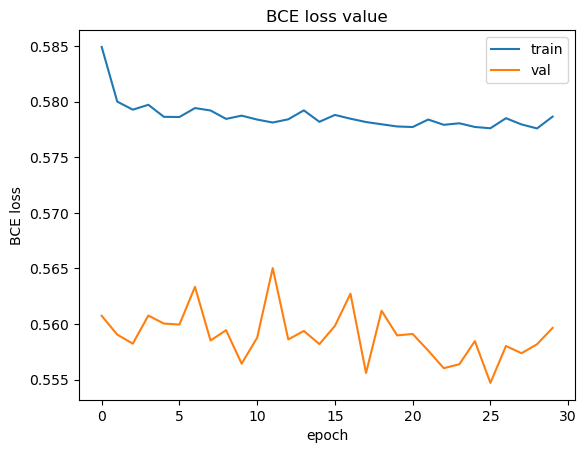

In [165]:
import matplotlib.pyplot as plt
plt.plot(losses_train)
plt.plot(losses_validate)
plt.title('BCE loss value')
plt.ylabel('BCE loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [1]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

y_true = []
y_score = []

with torch.no_grad():
    model_1.eval()
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)[:, 1] # Get the probabilities for class 1
        y_true += labels.cpu().numpy().tolist()
        y_score += probs.cpu().numpy().tolist()


# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = roc_auc_score(y_true, y_score)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate other quality metrics
y_pred = np.array(y_score) >= 0.5
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))
print('\nClassification Report:')
print(classification_report(y_true, y_pred))

NameError: name 'torch' is not defined

In [142]:
import torch

# Define the integer class labels
class_labels = torch.LongTensor([0, 1, 2, 1, 0])

# Determine the number of classes
num_classes = class_labels.max() + 1

# One-hot encode the class labels
one_hot = torch.nn.functional.one_hot(class_labels, num_classes=num_classes)

# Print the one-hot encoded tensor
print(one_hot)



tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0]])


In [ ]:
# Create a special DataLoader for CNN


In [144]:
class OneHotEncoder(torch.nn.Module):
    def __init__(self, num_classes):
        super(OneHotEncoder, self).__init__()
        self.num_classes = num_classes

    def forward(self, inp):
        one_hot = torch.nn.functional.one_hot(inp, num_classes=self.num_classes)
        return one_hot.float()

In [ ]:
class CNN_One_Hot(nn.Module):
    
    def __init__(self, vocab_size):

        super().__init__()
        self.one_hot_encoder = OneHotEncoder(vocab_size)
        conv_layer_1 = 
        
        

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=3, batch_first=True, dropout=0.2)
        self.fc1 = nn.Linear(hidden_size, 50)
        self.fc2 = nn.Linear(50, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        output, (h_n, c_n) = self.lstm1(x)
        x = self.fc1(h_n[-1])
        x = torch.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [27]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
text = list('KNEQFNCYGPINAYGFQRTGGEDW')
encoder = OneHotEncoder()
text_arr = np.array(text)
text_arr = text_arr.reshape(-1, 1)
encoder.fit(text_arr)
onehot = encoder.transform(text_arr).toarray()
print(onehot)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.

In [46]:
j = 0 
for i in ace2_dataloader:
    print(i)
    j += 1
    if j == 1:
        break

TypeError: new(): invalid data type 'str'

In [2]:
import torch
indices = torch.LongTensor([0, 1, 2, 3, 1, 1])
num_classes = 4
one_hot = torch.nn.functional.one_hot(indices, num_classes)
print(one_hot)

tensor([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 1, 0, 0]])


In [4]:
## RNN model

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=3, batch_first=True, dropout=0.2)
        self.fc1 = nn.Linear(hidden_size, 50)
        self.fc2 = nn.Linear(50, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        output, (h_n, c_n) = self.lstm1(x)
        x = self.fc1(h_n[-1])
        x = torch.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

def fit_RNN(X_train, y_train, RNN_name):
    # define the model
    input_size = X_train.shape[2]
    hidden_size = 80
    output_size = 1
    model = RNN(input_size, hidden_size, output_size)
    
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters())
    
    # Train the model
    for epoch in range(50):
        running_loss = 0.0
        for i in range(len(X_train)):
            optimizer.zero_grad()
            inputs = torch.tensor(X_train[i], dtype=torch.float32).unsqueeze(0)
            labels = torch.tensor(y_train[i], dtype=torch.float32).unsqueeze(0)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_loss = running_loss / len(X_train)
        print('Epoch [%d], train loss: %.4f' % (epoch+1, train_loss))
    
    # Save the model
    torch.save(model.state_dict(), RNN_name+"_RNN_All_3LSTM.pt")
    print(RNN_name+' RNN Model has been trained!')
    return model
